In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Algebra 3

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [2]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [3]:
c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

Dot product both sides by `X.T` ---> this will usually make it solvable.

In [4]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.54861111],
       [0.29861111],
       [1.55555556]])

What is special about dot product of a matrix with its transpose? Resultant shape is always a square.

In [5]:
(X.T @ X).shape

(3, 3)

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [6]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [7]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [8]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [9]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [10]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

,x,y
0,1.100586,2.804107
1,2.450320,5.753365
2,3.010942,5.047165
3,5.180405,11.068141
4,6.298746,12.325465
5,3.596320,6.580479
6,3.045593,5.882246
7,7.580141,17.263462
8,5.052647,11.041421
9,1.138932,2.474925


<AxesSubplot:xlabel='x', ylabel='y'>

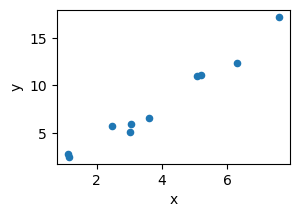

In [11]:
df.plot.scatter(x="x", y="y", figsize=(3, 2))

In [12]:
X = df[["x"]].values
X

array([[1.10058559],
       [2.4503204 ],
       [3.01094218],
       [5.18040499],
       [6.2987464 ],
       [3.59632042],
       [3.0455931 ],
       [7.58014087],
       [5.05264731],
       [1.13893201]])

In [13]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.00639925, 0.01424715, 0.01750684, 0.03012097, 0.03662346,
        0.02091046, 0.01770831, 0.04407401, 0.02937814, 0.00662221],
       [0.01424715, 0.03171956, 0.03897685, 0.06706069, 0.08153769,
        0.04655461, 0.03942541, 0.09812543, 0.06540686, 0.01474355],
       [0.01750684, 0.03897685, 0.04789457, 0.08240386, 0.10019313,
        0.05720608, 0.04844575, 0.12057607, 0.08037164, 0.01811681],
       [0.03012097, 0.06706069, 0.08240386, 0.141778  , 0.17238491,
        0.09842457, 0.08335219, 0.20745428, 0.13828151, 0.03117044],
       [0.03662346, 0.08153769, 0.10019313, 0.17238491, 0.20959922,
        0.11967238, 0.10134619, 0.25223934, 0.16813361, 0.03789949],
       [0.02091046, 0.04655461, 0.05720608, 0.09842457, 0.11967238,
        0.06832792, 0.05786443, 0.1440181 , 0.09599725, 0.02163902],
       [0.01770831, 0.03942541, 0.04844575, 0.08335219, 0.10134619,
        0.05786443, 0.04900328, 0.1219637 , 0.08129658, 0.0183253 ],
       [0.04407401, 0.09812543, 0.1205760

In [14]:
df["p"] = P @ df[["y"]]
df

,x,y,p
0,1.100586,2.804107,2.316459
1,2.450320,5.753365,5.157314
2,3.010942,5.047165,6.337284
3,5.180405,11.068141,10.903463
4,6.298746,12.325465,13.257293
5,3.596320,6.580479,7.569359
6,3.045593,5.882246,6.410215
7,7.580141,17.263462,15.954309
8,5.052647,11.041421,10.634565
9,1.138932,2.474925,2.397168


<AxesSubplot:xlabel='x', ylabel='p'>

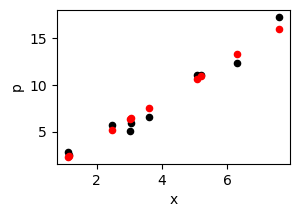

In [15]:
ax = df.plot.scatter(x="x", y="y", figsize=(3, 2), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [16]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [17]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [18]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

2.5089838276993124

### Lab review

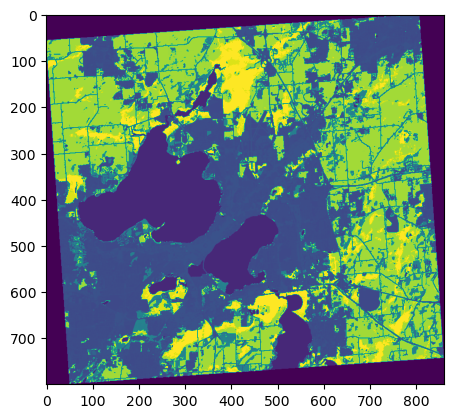

In [19]:
# As an exception, I am providing all the relevant import statements in this cell
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip://land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])

# Classification 1

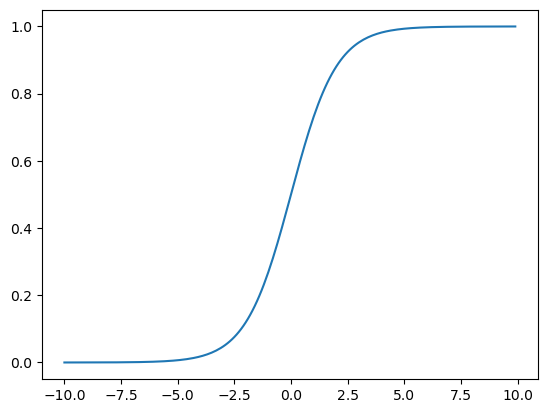

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [22]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [23]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


### Model 1: Predict petal width

- regression problem

In [36]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "petal width (cm)"

# 1. initialize model
reg_model = LinearRegression(fit_intercept=False)
# 2. fit using train data
reg_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["pet_width_predictions"] = reg_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob,pet_width_predictions
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437,1.327769
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275,1.590835
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368,1.279061
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430,0.083889
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543,1.889735
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721,0.830818
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773,0.538569
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524,1.155681
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481,0.610022
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072,0.895833


### LogisticRegression

- classification model
- predict categorical labels

### Model 2: Predict whether flower is "setosa"

- classification problem, specifically binary classification: True / False

In [37]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob,pet_width_predictions,setosa_predictions
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437,1.327769,False
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275,1.590835,False
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368,1.279061,False
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430,0.083889,True
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543,1.889735,False
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721,0.830818,False
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773,0.538569,True
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524,1.155681,False
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481,0.610022,True
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072,0.895833,False


What is the accuracy? That is what percent of the time is it correct?

Review of `score` method.

In [38]:
cls_model.score(test[xcols], test[ycol])

1.0

### Model 2b: Predict probablity of flower being "setosa"

- classification problem, probablity between 0 to 1

#### `<model object>.predict_proba(X)`

- Calibrated probabilities of classification.
- returns a numpy array of probabilities (that it is True):
    - [[False probablity, True probablity], ...]
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba

In [39]:
cls_model.predict_proba(test[xcols])  

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

Extract just the True probablities.

In [40]:
cls.predict_proba(test[xcols])[:, 1]

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [41]:
test["setosa_prob"] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob,pet_width_predictions,setosa_predictions
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437,1.327769,False
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275,1.590835,False
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368,1.279061,False
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430,0.083889,True
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543,1.889735,False
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721,0.830818,False
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773,0.538569,True
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524,1.155681,False
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481,0.610022,True
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072,0.895833,False


### Model 4: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [42]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predictions,setosa_prob,pet_width_predictions,setosa_predictions,variety_predictions
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437,1.327769,False,versicolor
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275,1.590835,False,virginica
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368,1.279061,False,versicolor
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430,0.083889,True,setosa
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543,1.889735,False,virginica
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721,0.830818,False,versicolor
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773,0.538569,True,setosa
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524,1.155681,False,versicolor
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481,0.610022,True,setosa
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072,0.895833,False,versicolor


What is the accuracy?

In [34]:
mult_model.score(test[xcols], test[ycol])

0.9